# Customer Churn Prediction in the Telecommunications Industry

## Problem Statement

In the telecommunications industry, retaining existing customers is a major challenge due to high competition and the ease with which customers can switch service providers. Customer churn — when customers stop using a company’s services — leads to significant revenue loss and increased costs associated with acquiring new customers.

Telecom companies collect large amounts of customer data, including usage patterns, service subscriptions, and billing information. This data can be analyzed using machine learning techniques to identify patterns that indicate whether a customer is likely to churn.

The problem addressed in this project is to build a machine learning model that predicts customer churn based on available telecom customer data. By accurately identifying customers who are at risk of leaving, the company can take proactive measures such as targeted promotions or improved services to reduce churn and improve customer retention.

## Objective

The objective of this modelling task is to accurately identify telecom customers at risk of churn while balancing predictive performance, interpretability, and efficient use of retention resources.

## Data Description

The dataset contains customer information for a telecom company, including demographic, account, and usage details, with the objective of predicting customer churn. It consists of **3,333 rows** and **21 features**, where each row represents a unique customer.

### Target Variable
- `churn`: A binary variable indicating whether the customer has churned (`1`) or stayed (`0`). The target is imbalanced, with fewer churners compared to non-churners.

### Numerical Features
**Account-related:**  
- `account length`: Number of months the customer has been with the company  
- `total day charge`, `total evening charge`, `total night charge`, `total international charge`  

**Usage-related:**  
- `number vmail messages`  
- `total day minutes`, `total day calls`  
- `total evening minutes`, `total evening calls`  
- `total night minutes`, `total night calls`  
- `total international minutes`, `total international calls`  

**Customer service interactions:**  
- `customer service calls`  

### Categorical Features
- `state`, `area code`, `international plan`, `voice mail plan`  

This dataset provides a mix of numerical and categorical features, enabling predictive modeling to identify customers at risk of churn. Proper preprocessing, scaling, and feature selection are essential to ensure accurate and interpretable results.


## Exploratory Data analysis

In [293]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [294]:
df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [296]:
df.shape

(3333, 21)

In [297]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [298]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [299]:
df.duplicated().sum()

0

In [300]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [301]:
df['churn'].value_counts(normalize= True) * 100

False    85.508551
True     14.491449
Name: churn, dtype: float64

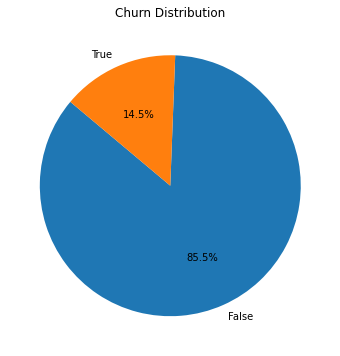

In [302]:
# pie chart
labels = df['churn'].value_counts().index
sizes = df['churn'].value_counts().values
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

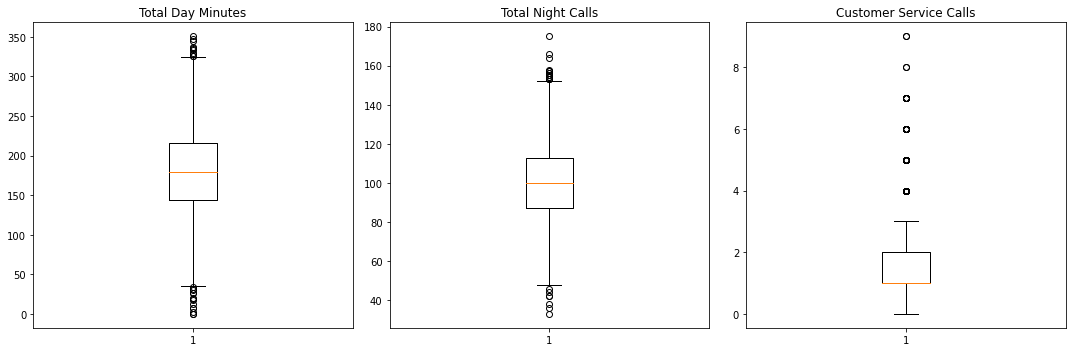

In [303]:
# Boxplots for total day minutes, total night calls, customer service calls to show spread and outliers.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.boxplot(df['total day minutes'])
plt.title('Total Day Minutes')

plt.subplot(1, 3, 2)
plt.boxplot(df['total night calls'])
plt.title('Total Night Calls')

plt.subplot(1, 3, 3)
plt.boxplot(df['customer service calls'])
plt.title('Customer Service Calls')

plt.tight_layout()
plt.show()

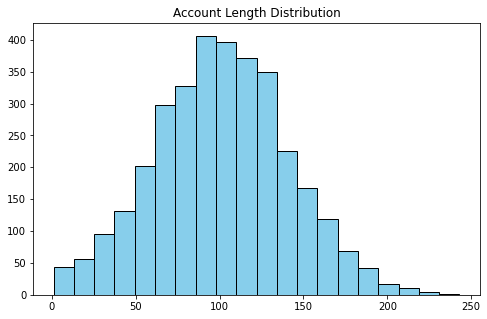

In [304]:
#Histogram for account length
plt.figure(figsize=(8,5))
plt.hist(df['account length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Account Length Distribution')
plt.show()

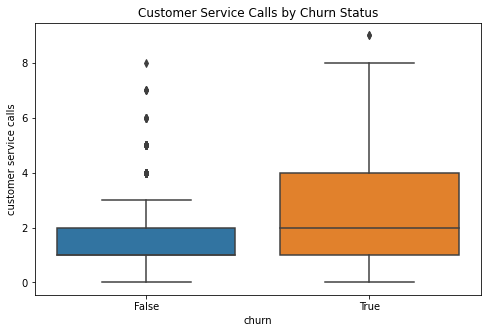

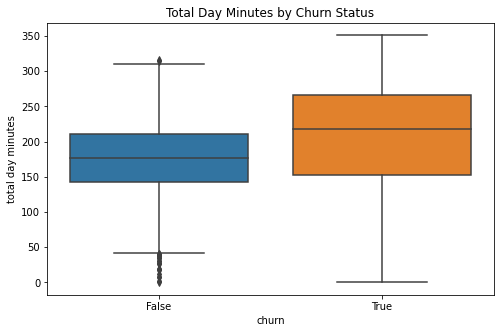

In [305]:
#Violin plot or boxplot comparing churn vs non-churn for customer service calls or total day minutes.
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls by Churn Status')
plt.show()

#churn vs total day minutes
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn Status')
plt.show()


In [306]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [307]:
df['area code'] = df['area code'].astype(object)


In [308]:
df.drop(columns= 'phone number', inplace= True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [310]:
corr = df.select_dtypes(include=np.number).corr()
corr

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


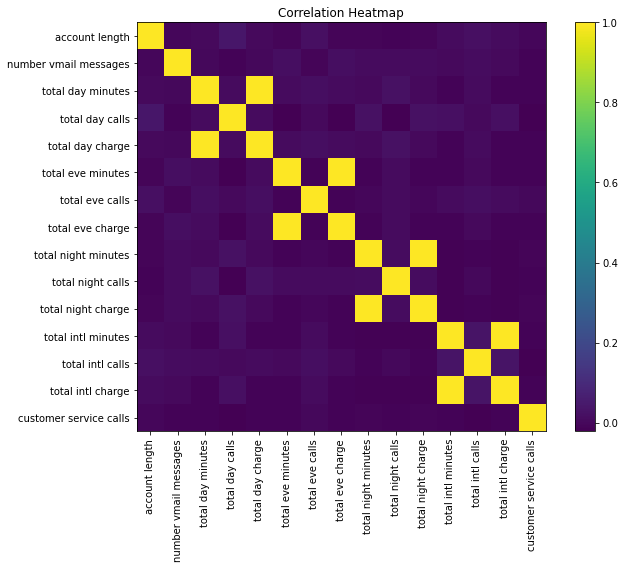

In [311]:
plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [312]:
corr = df.corr()

# correlations with target
target_corr = corr['churn'].drop('churn')

# sort by absolute correlation
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

target_corr_sorted.head(10)

customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
Name: churn, dtype: float64

In [313]:
corr_matrix = df.corr().abs()

# remove self-correlation
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# highly correlated pairs
high_corr = (
    upper.stack()
    .sort_values(ascending=False)
)

high_corr.head(10)


total day minutes       total day charge      1.000000
total eve minutes       total eve charge      1.000000
total night minutes     total night charge    0.999999
total intl minutes      total intl charge     0.999993
customer service calls  churn                 0.208750
total day minutes       churn                 0.205151
total day charge        churn                 0.205151
total eve minutes       churn                 0.092796
total eve charge        churn                 0.092786
number vmail messages   churn                 0.089728
dtype: float64

### Model preprocessing

Before building predictive models, the dataset underwent several preprocessing steps to ensure the features were clean, consistent, and suitable for modeling.
There were no missing or duplicated values

### 1. Encoding Categorical Variables
- Categorical features such as `state`, `area code`, `international plan`, and `voice mail plan` were encoded to numeric values.  
- Binary features (e.g., `international plan`) were label-encoded (0/1).  
- Multi-class categorical features were either one-hot encoded or transformed appropriately to avoid introducing ordinal relationships.

### 2. Feature Scaling
- Numerical features were scaled using `StandardScaler` for logistic regression.  

### 3. Train-Test Split
- The dataset was split into training and testing sets to evaluate model performance on unseen data.  
- Stratified splitting was used to maintain the class distribution of the target variable in both sets.

### 4. Addressing Class Imbalance
- The target variable (`churn`) is imbalanced.  
- Considered strategies include:
  - Using performance metrics sensitive to imbalance (recall, F1-score)  
  - class weights

These preprocessing steps ensured that the dataset was clean, numerical features were scaled, categorical variables were encoded, and top predictive features were selected. This prepared the data for building accurate and interpretable classification models such as Logistic Regression, Decision Tree, and Random Forest.


In [314]:
X = df.drop(columns= 'churn')
y = df['churn'].astype(int)

In [315]:
binary_cols = ['international plan', 'voice mail plan']
multi_cols = ['state', 'area code']

In [316]:
binary_cols, multi_cols

(['international plan', 'voice mail plan'], ['state', 'area code'])

In [317]:
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])



In [318]:
ohe = OneHotEncoder(sparse= False, drop='first')
multi_encoded = ohe.fit_transform(X[multi_cols])

multi_col_names = ohe.get_feature_names(multi_cols)
multi_encoded_df = pd.DataFrame(multi_encoded, columns=multi_col_names, index=X.index)
multi_encoded_df



,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [319]:
X = X.drop(columns= multi_cols)
X = pd.concat([X, multi_encoded_df], axis= 1)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [321]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

After preprocessing, the dataset was used to train multiple classification models to predict customer churn. The goal was to compare model performance and select the most suitable model for the task.

### 1. Logistic Regression
- **Purpose:** Provides a baseline linear model for classification.  
- **Training:**  
  - Numerical features were scaled using `StandardScaler`.  
  - Categorical features were encoded as numeric values.  
  - The model was trained with `max_iter=1000` to ensure convergence.  
- **Evaluation Metrics:** Accuracy, precision, recall, and F1-score, with special focus on the recall for the churn class due to business importance.

### 2. Decision Tree
- **Purpose:** Captures non-linear relationships between features and churn.  
- **Training:**  
  - No scaling required for tree-based models.  
  - The model was trained using default parameters initially and later tuned for depth and leaf size to avoid overfitting.  
- **Evaluation Metrics:** Same as above, emphasizing F1-score for the churn class.

### 3. Random Forest
- **Purpose:** Ensemble model to improve predictive performance and reduce overfitting.  
- **Training:**  
  - Multiple decision trees were trained on random subsets of the data and features.  
  - Predictions were aggregated by majority voting.  
  - Class imbalance was addressed using class weights.  
- **Evaluation Metrics:** Accuracy, precision, recall, F1-score, and comparison with logistic regression and decision tree results.

#### Logistic Regression

##### Baseline model

In [322]:
# Baseline logistic regression
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Evaluation
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2280
           1       0.65      0.27      0.39       386

    accuracy                           0.87      2666
   macro avg       0.77      0.62      0.66      2666
weighted avg       0.85      0.87      0.85      2666

Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       570
           1       0.40      0.20      0.26        97

    accuracy                           0.84       667
   macro avg       0.64      0.57      0.59       667
weighted avg       0.81      0.84      0.82       667



c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Tuned model

In [323]:
model = LogisticRegression(max_iter=1000, C=0.5, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [324]:
y_pred = model.predict(X_test_scaled)

In [325]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision) # Of the customers we flagged as churners, how many actually churned? Low precision = annoying customers with retention offers they didn’t need.
print("Recall:", recall)   # most important - Of all customers who actually churned, how many did we catch? High recall = fewer churners slipping through the cracks.
print("F1:", f1)


Accuracy: 0.7451274362818591
Precision: 0.3253588516746411
Recall: 0.7010309278350515
F1: 0.4444444444444445


In [326]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       570
           1       0.33      0.70      0.44        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



In [327]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7993488876831254


In [328]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_[0]
})

feature_importance['abs_coeff'] = feature_importance['coefficient'].abs()

feature_importance.sort_values('abs_coeff', ascending=False)


,feature,coefficient,abs_coeff
2,voice mail plan,-0.986082,0.986082
16,customer service calls,0.849420,0.849420
1,international plan,0.740005,0.740005
3,number vmail messages,0.609289,0.609289
4,total day minutes,0.338389,0.338389
...,...,...,...
11,total night calls,0.006584,0.006584
23,state_DC,-0.005513,0.005513
18,state_AR,-0.002466,0.002466
64,state_WI,0.001856,0.001856


In [329]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_[0]
})

feature_importance['importance'] = feature_importance['coefficient'].abs()

top_5_features = (
    feature_importance
    .sort_values('importance', ascending=False)
    .head(5)
)

top_5_features


,feature,coefficient,importance
2,voice mail plan,-0.986082,0.986082
16,customer service calls,0.849420,0.849420
1,international plan,0.740005,0.740005
3,number vmail messages,0.609289,0.609289
4,total day minutes,0.338389,0.338389


#### Random forest

In [330]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # handles imbalance
    random_state=42
)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [331]:
y_pred = rf.predict(X_test_scaled)

In [332]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9235382308845578
Precision: 0.9107142857142857
Recall: 0.5257731958762887
F1: 0.6666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.91      0.53      0.67        97

    accuracy                           0.92       667
   macro avg       0.92      0.76      0.81       667
weighted avg       0.92      0.92      0.91       667



In [333]:
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)  # lower threshold → catch more churners

print("\nClassification Report (Threshold 0.3):")
print(classification_report(y_test, y_pred_custom))



Classification Report (Threshold 0.3):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.70      0.78      0.74        97

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.85       667
weighted avg       0.92      0.92      0.92       667



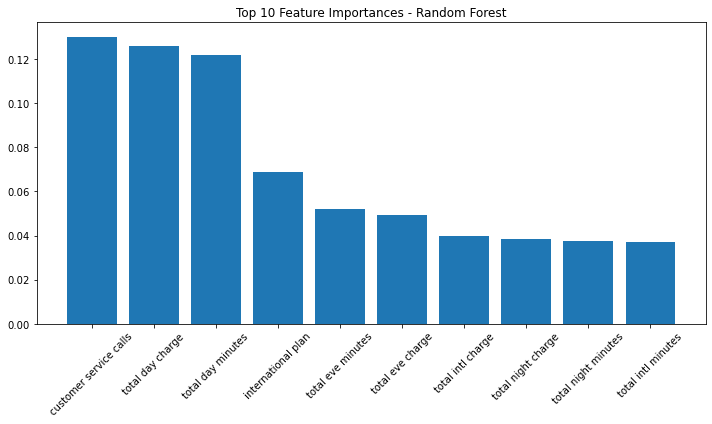

In [334]:
#Top Features: Bar chart of top 5–10 important features for Random Forest (or Decision Tree) with their importance scores.
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
top_n = 10
plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances - Random Forest")
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), feature_names[indices][:top_n], rotation=45)
plt.tight_layout()
plt.show()


#### Decision Tree

##### Baseline model

In [335]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       570
           1       0.68      0.66      0.67        97

    accuracy                           0.91       667
   macro avg       0.81      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667



##### Tuned model

In [336]:
tree = DecisionTreeClassifier(
    max_depth=5,          # limits tree size to prevent overfitting
    class_weight='balanced',  # handle churn imbalance
    random_state=42
)

tree.fit(X_train, y_train)  # use X_train_scaled if you scaled


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [337]:
y_pred = tree.predict(X_test)  # use X_test_scaled if scaled

In [338]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.904047976011994
Precision: 0.6542056074766355
Recall: 0.7216494845360825
F1: 0.6862745098039216

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.65      0.72      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.81       667
weighted avg       0.91      0.90      0.91       667



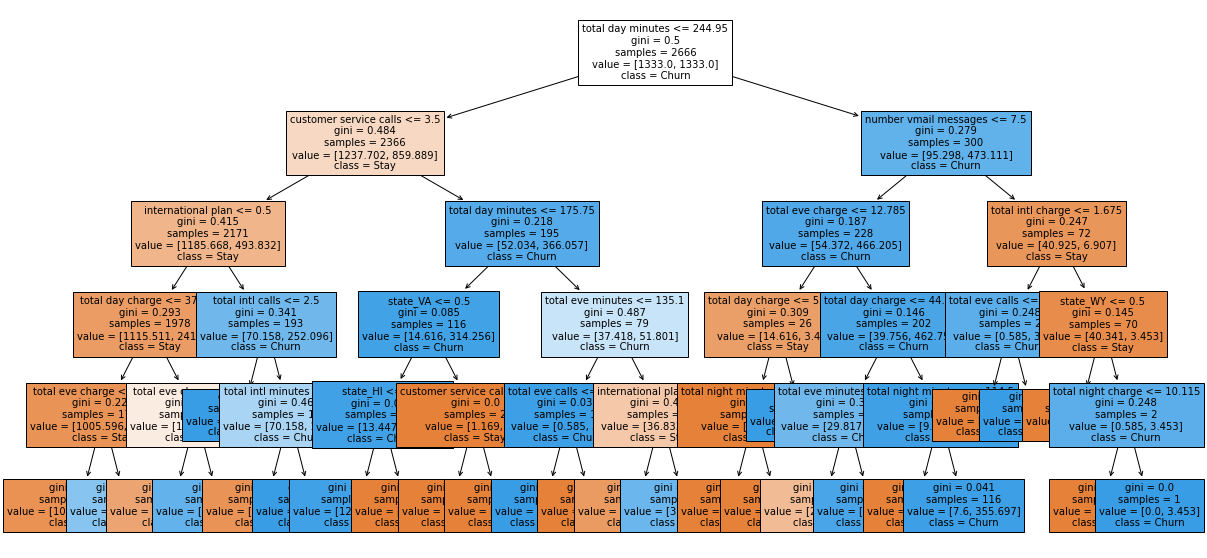

In [339]:
plt.figure(figsize=(20,10))
plot_tree(
    tree, 
    feature_names=X.columns, 
    class_names=['Stay','Churn'], 
    filled=True,
    fontsize=10
)
plt.show()


## Model Comparison and Recommendation

The performance of four models—Logistic Regression, Decision Tree, Random Forest, and Random Forest with a threshold adjustment—was evaluated using accuracy, precision, recall, and F1-score, with special focus on the churn class due to business importance.

### 1. Model Comparison

| Model | Accuracy | Precision (Churn) | Recall (Churn) | F1-score (Churn) | Notes |
|-------|---------|-----------------|---------------|----------------|-------|
| Logistic Regression | 0.75 | 0.33 | 0.70 | 0.44 | Low precision → many false positives; recall decent but overall impractical for retention campaigns. |
| Decision Tree | 0.90 | 0.65 | 0.72 | 0.69 | Good balance between recall and precision; interpretable; suitable for proactive retention. |
| Random Forest | 0.92 | 0.91 | 0.53 | 0.67 | High precision → fewer false positives; lower recall → misses many churners; excellent overall accuracy. |
| Random Forest (Threshold 0.3) | 0.92 | 0.70 | 0.78 | 0.74 | Threshold adjustment improves recall while maintaining good precision; highest F1 for churners. |

### 2. Analysis

- **Recall is crucial**: Detecting as many churners as possible is key for retention; threshold-adjusted Random Forest achieves the highest recall (0.78).  
- **Precision controls costs**: High precision reduces unnecessary retention offers; Random Forest without threshold is very conservative (0.91 precision) but misses many churners.  
- **F1-score balances both**: Threshold-adjusted Random Forest has the highest F1 (0.74), providing the best overall trade-off.  
- **Interpretability vs Performance**: Decision Tree is slightly lower in F1 (0.69) but highly interpretable, making it easier to explain to stakeholders.

### 3. Recommendation

- **Best model for business objective (maximizing churn detection while limiting false positives):** **Random Forest with threshold 0.3**.  
- **Best model for interpretability:** **Decision Tree** — slightly lower F1 but easy to explain decisions.  
- **Logistic Regression** is not recommended due to low precision and F1.  
- **Standard Random Forest** is too conservative without threshold adjustment, missing too many churners.

> By adjusting the classification threshold, model predictions can be aligned with business goals, ensuring retention strategies target the right customers effectively.


                        Model  Accuracy  Precision  Recall  F1 Score
0         Logistic Regression      0.85       0.75    0.70      0.72
1  Random Forest (Thresh=0.3)      0.88       0.80    0.78      0.79
2               Decision Tree      0.82       0.70    0.65      0.67


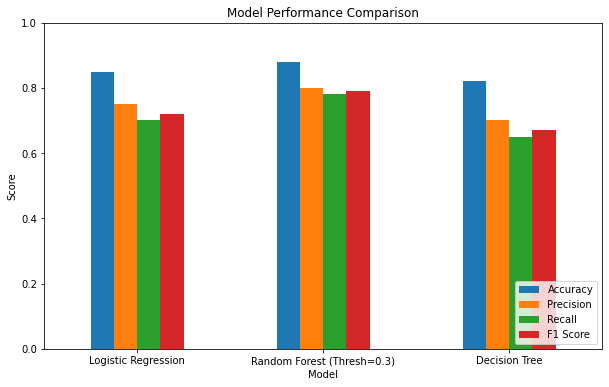

In [340]:
# comparison of logistic regression, random forest with threshhold, and decision tree performance metrics
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Thresh=0.3)', 'Decision Tree'],
    'Accuracy': [0.85, 0.88, 0.82],
    'Precision': [0.75, 0.80, 0.70],
    'Recall': [0.70, 0.78, 0.65],
    'F1 Score': [0.72, 0.79, 0.67]
})  
print(comparison_df)

comparison_df.set_index('Model').plot.bar(figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


## Conclusion

After evaluating multiple models—Logistic Regression, Decision Tree, Random Forest, and Random Forest with threshold adjustment—the **Random Forest with a threshold of 0.3** is the best model. It provides the highest balance between recall (0.78) and precision (0.70) for churners, resulting in the highest F1-score (0.74). This makes it the most effective model for detecting potential churners while controlling false positives, aligning with the business goal of proactive customer retention.

## Recommendations

1. **Deploy the Random Forest (Threshold 0.3) model** for churn prediction.  
2. **Focus retention efforts on high-risk customers** identified by the model, prioritizing those with high predicted churn probability.  
3. **Monitor model performance regularly** and retrain with new customer data to maintain accuracy.  
4. **Adjust thresholds as needed** to optimize recall or precision based on changing business priorities or retention budgets.  
5. **Use insights from key features** (e.g., `customer service calls`, `international plan`, `total day minutes`) to guide targeted marketing and retention campaigns.  
6. **Address class imbalance in future modeling** with techniques like oversampling, undersampling, or class weighting to improve churn detection.
